## For Notebook 4, repeat all the steps in Notebook 3 using the Prostate data set. The target is LPSA (log PSA test results).

Like in Notebook 3, I will load the packages I know I will need and read in my dataframe:

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os

#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, r2_score, mean_squared_error,mean_absolute_error

In [2]:
cd /Users/Tyler/Desktop/Katie/Predictive Models (Spring B 2019)/

C:\Users\Tyler\Desktop\Katie\Predictive Models (Spring B 2019)


In [5]:
Prostate=pd.read_csv("prostate.csv")
#Prostate

Setting my target variable:

In [7]:
targetName = 'lpsa'
targetSeries = Prostate[targetName]

del Prostate[targetName]
Prostate.insert(0, targetName, targetSeries)

Prostate.head(10)

,lpsa,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.430783,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.162519,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.162519,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-0.162519,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.371564,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
5,0.765468,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0
6,0.765468,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
7,0.854415,0.693147,3.539509,58,1.536867,0,-1.386294,6,0
8,1.047319,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
9,1.047319,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0


Some more EDA and preprocessing:

In [9]:
Prostate=Prostate.apply(pd.to_numeric,errors='coerce')

In [10]:
Prostate = Prostate.fillna(Prostate.mean())

In [11]:
Prostate.shape

(97, 9)

In [12]:
Prostate.dtypes

lpsa       float64
lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
dtype: object

In [13]:
Prostate["age"] = Prostate["age"].astype('float')
Prostate["svi"] = Prostate["svi"].astype('float')
Prostate["gleason"] = Prostate["gleason"].astype('float')
Prostate["pgg45"] = Prostate["pgg45"].astype('float')

In [14]:
Prostate.dtypes

lpsa       float64
lcavol     float64
lweight    float64
age        float64
lbph       float64
svi        float64
lcp        float64
gleason    float64
pgg45      float64
dtype: object

Creating my training and validation sets on a 70/30 split:

In [18]:
features_train, features_test, target_train, target_test = train_test_split(
    Prostate.iloc[:,1:].values, Prostate.iloc[:,0].values, test_size=0.30, random_state=0)

In [19]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(30, 8)
(67, 8)
(30,)
(67,)


In [20]:
Prostate_target=Prostate['lpsa']
Prostate_features=Prostate.drop(['lpsa'],axis=1)
print(Prostate_target.shape)
print(Prostate_features.shape)

(97,)
(97, 8)


Now I'm going to move onto my four models, and interpret the results at the very end:

### Ridge Regression:

In [21]:
from sklearn.linear_model import Ridge
import os as os
from sklearn.metrics import mean_squared_error

model_RG = Ridge(alpha=20)
model_RG.fit(Prostate_features, Prostate_target)
print(model_RG)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [22]:
expected_RG = Prostate_target
predicted_RG= model_RG.predict(Prostate_features)

print("Coef", model_RG.intercept_, model_RG.coef_)
print("MSE", mean_squared_error(expected_RG, predicted_RG))
print("R-squared", r2_score(expected_RG, predicted_RG))
print("MAE:", mean_absolute_error(expected_RG, predicted_RG))

Coef 1.4168580237699806 [ 0.49621173  0.25286363 -0.01206267  0.10413618  0.25737178  0.0460034
  0.00794865  0.00520101]
MSE 0.5007958923848376
R-squared 0.6202463220570023
MAE: 0.5495089598023396


In [23]:
pd.DataFrame(np.transpose(model_RG.coef_))

,0
0,0.496212
1,0.252864
2,-0.012063
3,0.104136
4,0.257372
5,0.046003
6,0.007949
7,0.005201


In [25]:
param_grid = dict(alpha=[0.01,2,5,10,100]) 

grid_search = GridSearchCV(model_RG, param_grid=param_grid,n_jobs=-1,cv=5) ## Cross validates the model 5 times ##
grid_search.fit(Prostate_features, Prostate_target)

#print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)   

Best {'alpha': 10}


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
param_grid = dict(alpha=[0.01,0.1,5,0.5])

grid_search = GridSearchCV(model_RG, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(Prostate_features, Prostate_target)

#print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_) 

Best {'alpha': 5}


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
range=list(np.arange(0.01,10,0.01))
param_grid = dict(alpha=range)

grid_search = GridSearchCV(model_RG, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(Prostate_features, Prostate_target)

#print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)  

Best {'alpha': 9.99}


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
model_RG_tuned = Ridge(alpha=9.99)
model_RG_tuned.fit(Prostate_features, Prostate_target)
print(model_RG_tuned)

expected_RG_tuned = Prostate_target
predicted_RG_tuned= model_RG_tuned.predict(Prostate_features)

print("Coef", model_RG_tuned.intercept_, model_RG_tuned.coef_)
print("MSE", mean_squared_error(expected_RG_tuned, predicted_RG_tuned))
print("R-squared", r2_score(expected_RG_tuned, predicted_RG_tuned))
print("MAE:", mean_absolute_error(expected_RG_tuned, predicted_RG_tuned))

Ridge(alpha=9.99, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Coef 1.2269472646607766 [ 0.54229451  0.32262716 -0.01486566  0.10552091  0.37322267  0.00214884
  0.01134252  0.0050323 ]
MSE 0.477311530744281
R-squared 0.638054520651993
MAE: 0.5331955781293747


In [29]:
scores = cross_val_score(model_RG_tuned, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean()  

Cross Validation Score for each K [0.72722784 0.29595022 0.59140579 0.24705661 0.60088974]


0.4925060387076006

### LASSO Regression:

In [31]:
from sklearn.linear_model import Lasso

model_LAS = Lasso(alpha=0.1)
model_LAS.fit(Prostate_features, Prostate_target)
print(model_LAS)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [32]:
expected_LAS = Prostate_target
predicted_LAS = model_LAS.predict(Prostate_features)

print("Coef", model_LAS.intercept_,model_LAS.coef_)
print("MSE", mean_squared_error(expected_LAS, predicted_LAS))
print("R-squared", r2_score(expected_LAS, predicted_LAS))
print("MAE:", mean_absolute_error(expected_LAS, predicted_LAS))

Coef 1.6699333664535907 [ 0.57700424  0.06179715 -0.00577247  0.07308461  0.          0.
 -0.          0.00677141]
MSE 0.5576559643302158
R-squared 0.5771293121579517
MAE: 0.5726483342936962


In [33]:
range=list(np.arange(0.01,2,0.01))
param_grid = dict(alpha=range)

grid_search = GridSearchCV(model_LAS, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(Prostate_features, Prostate_target)
print("Best", grid_search.best_params_)  

Best {'alpha': 0.21000000000000002}


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
model_LAS_tuned = Lasso(alpha=0.21)
model_LAS_tuned.fit(Prostate_features, Prostate_target)
print(model_LAS_tuned)

expected_LAS_tuned = Prostate_target
predicted_LAS_tuned = model_LAS_tuned.predict(Prostate_features)

print("Coef", model_LAS_tuned.intercept_, model_LAS_tuned.coef_)
print("MSE", mean_squared_error(expected_LAS_tuned, predicted_LAS_tuned))
print("R-squared", r2_score(expected_LAS_tuned, predicted_LAS_tuned))
print("MAE:", mean_absolute_error(expected_LAS_tuned, predicted_LAS_tuned))

Lasso(alpha=0.21, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Coef 1.6270564559096594 [ 0.48050171  0.         -0.          0.01902194  0.          0.
  0.          0.00823329]
MSE 0.6192191057358085
R-squared 0.5304459632527391
MAE: 0.6059526716270308


In [35]:
scores = cross_val_score(model_LAS_tuned, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean()  

Cross Validation Score for each K [0.69323538 0.13888994 0.44887148 0.07125628 0.47989816]


0.36643024603564084

### EN Regression:

In [36]:
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet(alpha=0.1)
model_EN.fit(Prostate_features, Prostate_target)
print(model_EN)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [37]:
expected_EN = Prostate_target
predicted_EN = model_EN.predict(Prostate_features)
print("Coef", model_EN.intercept_, model_EN.coef_)
print("MSE", mean_squared_error(expected_EN, predicted_EN))
print("R-squared", r2_score(expected_EN, predicted_EN))
print("MAE:", mean_absolute_error(expected_EN, predicted_EN))

Coef 1.4046104347158266 [ 0.55610267  0.21993986 -0.01063951  0.0868288   0.20365307  0.
 -0.          0.00600293]
MSE 0.5033475294995444
R-squared 0.618311414854646
MAE: 0.5466221381144234


In [38]:
range=list(np.arange(0.01,2,0.01))
param_grid = dict(alpha=range)

grid_search_EN = GridSearchCV(model_EN, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search_EN.fit(Prostate_features, Prostate_target)

print("Best", grid_search_EN.best_params_)

Best {'alpha': 0.38}


C:\Users\Tyler\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
model_EN_tuned = ElasticNet(alpha=0.38)
model_EN_tuned.fit(Prostate_features, Prostate_target)
print(model_EN_tuned)

expected_EN_tuned = Prostate_target
predicted_EN_tuned = model_EN_tuned.predict(Prostate_features)

print("Coef", model_EN_tuned.intercept_, model_EN_tuned.coef_)
print("MSE", mean_squared_error(expected_EN_tuned, predicted_EN_tuned))
print("R-squared", r2_score(expected_EN_tuned, predicted_EN_tuned))
print("MAE:", mean_absolute_error(expected_EN_tuned, predicted_EN_tuned))

ElasticNet(alpha=0.38, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Coef 1.676227292954372 [ 0.42572169  0.         -0.          0.02596384  0.          0.
  0.          0.00922118]
MSE 0.6423540543809708
R-squared 0.5129027246387301
MAE: 0.612498456743951


In [40]:
scores = cross_val_score(model_EN_tuned, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [0.67771032 0.09745813 0.43715639 0.02494059 0.46222378]


0.3398978422625413

### Linear Regression:

In [42]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression(normalize=True)
model_LR.fit(Prostate_features, Prostate_target)
print(model_LR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [43]:
expected_LR = Prostate_target
predicted_LR = model_LR.predict(Prostate_features)

print("Coef:", model_LR.intercept_, model_LR.coef_)
print("MSE:", mean_squared_error(expected_LR, predicted_LR))
print("R-Squared:", r2_score(expected_LR, predicted_LR))
print("MAE:", mean_absolute_error(expected_LR, predicted_LR))

Coef: 0.6693990271843557 [ 0.58702288  0.45446064 -0.01963721  0.10705435  0.76615588 -0.10547357
  0.04513596  0.00452532]
MSE: 0.4552899841679034
R-Squared: 0.6547534661376441
MAE: 0.5175864588758596


In [44]:
scores_LR = cross_val_score(model_LR, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores_LR)
scores_LR.mean() 

Cross Validation Score for each K [0.67104622 0.3011861  0.61157052 0.35585353 0.67441406]


0.5228140859421305

## Final Results & Method Selection

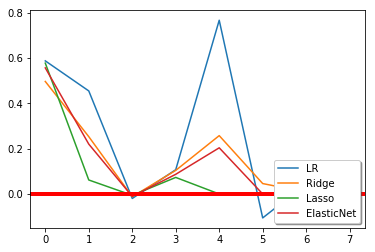

In [45]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.axhline(linewidth=4, color='r')
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

- LR:

MSE: 0.4552899841679034
R-Squared: 0.6547534661376441
MAE: 0.5175864588758596
CV: 0.522814

- EN:

MSE 0.6423540543809708
R-squared 0.5129027246387301
MAE: 0.612498456743951
CV: 0.339897

- LASSO:

MSE 0.6192191057358085
R-squared 0.5304459632527391
MAE: 0.6059526716270308
CV: 0.366430

- RR:

MSE 0.477311530744281
R-squared 0.638054520651993
MAE: 0.5331955781293747
CV: 0.492506

Based on the above results of my four models, I would choose to employ linear regression as my chosen method. I was drawn to the high r-squared score of my EN and LASSO since they were accounting for half of the variability in my model (half of my features were deemed as having predictive ability). These models seemed less complex due to the feature selection, however I would not use either because a) their MSE and MAE are over 60% and b) their cross validation scores show low stability when performed on unseen data.

My linear regression model performs the best in all four categories - at a glance, I see that it accounts for 65% of the variability in the data and has the highest cross validation score for unseen data. 